### Integrantes

Rafael Augusto Monteiro - 9293095  
William Quelho Ferreira - 9293421

# Exploração dos dados - Parte VII

Datasets selecionado:
* Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('default')

In [2]:
path = "train.csv"

df = pd.read_csv(path)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    #svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'dt', '3nn', '5nn', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

### Perguntas

1. Realizar 10-fold Cross-Validation nos algoritmos da prática passada utilizando as métricas vista na aula de hoje (acuácia, precisão, revocação, sensitividade, especificidade, medida-F e média harmônica). Comentar se no seu cenário alguma dessa medidas apresentou algum problema.
2. Escolha dois classificadores e plot a curva ROC e calcule a AUC para os mesmos.
3. Explique o desempenho dos classificadores que você treinou na questão anterior pela curva ROC. Como a AUC sintetiza a curva ROC e como podemos utilizá-la para comparar classificadores?

### Respostas

### 1.

Para essa prática, serão utilizados os atributos Pclass, Age, Sibsp e Parch para predizer a classe Survived (se o passageiro sobreviveu ou não). 

In [14]:
from sklearn.metrics import confusion_matrix
# Separando atributos relevantes
selected = df.iloc[:,[1,2,5,6,7]]
selected.dropna(inplace=True)

# Realizando a classificação
res = classificacao(selected, range(1,len(selected.columns)), 0, score=confusion_matrix, score_name='False Positive Rate',folds=10, plot=False)

In [15]:
def calc_metric(results, metric):
    values = {}
    for c_name, confusion_matrix_list in results.items():
        conf_matrix = sum(confusion_matrix_list)
        values[c_name] = metric(conf_matrix)
    return values

In [28]:
def accuracy(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return (tn + tp) / np.sum(conf_matrix)

def precision(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tp / (tp + fp)

def recall(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tp / (tp + fn)

sensitivity = recall

def specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    return tn / (tn + fp)

def f1(conf_matrix):
    prec, rec = precision(conf_matrix), recall(conf_matrix)
    return 2 * (prec * rec) / (prec + rec)

metrics = {}
metrics['accuracy'] = calc_metric(res['results'], accuracy)
metrics['precision'] = calc_metric(res['results'], precision)
metrics['recall'] = calc_metric(res['results'], recall)
metrics['sensitivity'] = calc_metric(res['results'], sensitivity)
metrics['specificity'] = calc_metric(res['results'], specificity)
metrics['f1'] = calc_metric(res['results'], f1)

In [31]:
from pprint import pprint

# imprimir em ordem de inserção
pprint(list(metrics.items()))

[('accuracy',
  {'3nn': 0.6554621848739496,
   '5nn': 0.6722689075630253,
   '7nn': 0.6708683473389355,
   'dt': 0.7100840336134454,
   'perceptron': 0.5714285714285714}),
 ('precision',
  {'3nn': 0.5852713178294574,
   '5nn': 0.6157024793388429,
   '7nn': 0.6222222222222222,
   'dt': 0.6693877551020408,
   'perceptron': 0.45}),
 ('recall',
  {'3nn': 0.5206896551724138,
   '5nn': 0.5137931034482759,
   '7nn': 0.4827586206896552,
   'dt': 0.5655172413793104,
   'perceptron': 0.2482758620689655}),
 ('sensitivity',
  {'3nn': 0.5206896551724138,
   '5nn': 0.5137931034482759,
   '7nn': 0.4827586206896552,
   'dt': 0.5655172413793104,
   'perceptron': 0.2482758620689655}),
 ('specificity',
  {'3nn': 0.7476415094339622,
   '5nn': 0.7806603773584906,
   '7nn': 0.7995283018867925,
   'dt': 0.8089622641509434,
   'perceptron': 0.7924528301886793}),
 ('f1',
  {'3nn': 0.5510948905109491,
   '5nn': 0.5601503759398496,
   '7nn': 0.5436893203883495,
   'dt': 0.6130841121495327,
   'perceptron': 0.32}

### 2.

In [40]:
def classificacao_roc(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    #prcp = Perceptron()
    #svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    #_3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    #_5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [dt, _7nn]
    clfs_names = ['dt', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# Dividindo dataset em treino e teste
selected = selected.sample(frac=1)
train = selected[:int(len(selected)*0.8)]
test = selected.drop(train.index)

# rodando os classificadores com 10-fold CV e calculando ROC_curve como medida de desempenho
roc_res = classificacao_roc(train, range(1,len(selected.columns)), 0, score=roc_curve, plot=False)
roc_res['results']['dt']

[(array([0.        , 0.15942029, 1.        ]),
  array([0.        , 0.52173913, 1.        ]),
  array([2, 1, 0], dtype=int64)),
 (array([0.        , 0.29032258, 1.        ]),
  array([0.        , 0.69230769, 1.        ]),
  array([2, 1, 0], dtype=int64)),
 (array([0.        , 0.18666667, 1.        ]),
  array([0.        , 0.51282051, 1.        ]),
  array([2, 1, 0], dtype=int64)),
 (array([0.        , 0.26153846, 1.        ]),
  array([0.        , 0.55102041, 1.        ]),
  array([2, 1, 0], dtype=int64)),
 (array([0.        , 0.13888889, 1.        ]),
  array([0.        , 0.42857143, 1.        ]),
  array([2, 1, 0], dtype=int64))]

In [4]:
from sklearn.metrics import confusion_matrix

def false_positive_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn)

O melhor modelo encontrado foi dado pelo algoritmo 7nn, que é relativamente simples, apresentou baixa taxa de falsos positivos e variância pequena.

### 3.


In [6]:
import random
from itertools import chain
from functools import reduce
import operator as op

def kfold_split(data, n_folds):
    idx = list(data.index)
    random.shuffle(idx)
    
    # Tamanho dos primeiros k-1 folds. O resto da divisáo vai pro último.
    fold_size = round(len(idx) / n_folds)
    # Lista dos primeiros k-1 folds, de índices consecutivos do dataframe aleatorizado.
    folds = list(idx[i*fold_size:(i+1)*fold_size] for i in range(n_folds - 1))
    # Criação do último fold, com o restante dos índices
    folds.append(list(idx[(n_folds-1)*fold_size:]))
    
    # Variação de qual fold é o fold de teste.
    for test_id, test_fold in enumerate(folds):
        # train_fold são todos os folds que não são o test_fold
        train_fold = reduce(op.add, (folds[i] for i in range(n_folds) if i != test_id), [])
        yield pd.Index(train_fold), pd.Index(test_fold)
        
def leave_one_out_split(data):
    return kfold_split(data, len(data))

def bootstrap_split(data, n_samples, *, total_frac=1.0, train_fraction=0.2):
    for n in range(n_samples):
        sample = data.sample(frac=total_frac, replace=True)
        train_sample = sample.sample(frac=train_fraction).index
        test_sample = sample.index.difference(train_sample)
        yield (train_sample, test_sample)

In [7]:
test_list = pd.DataFrame(list(chr(i) for i in range(10)))
print(test_list.index)
print('K-fold (5 fold)')
for train, test in kfold_split(test_list, n_folds=5):
    print(f'{train}\t{test}')
    
print('Leave one out')
for train, test in leave_one_out_split(test_list):
    print(f'{train}\t{test}')

print('Bootstrap, 5 samples')
for train, test in bootstrap_split(test_list, n_samples=5):
    print(f'{train}\t{test}')

RangeIndex(start=0, stop=10, step=1)
K-fold (5 fold)
Int64Index([4, 6, 0, 1, 3, 8, 7, 2], dtype='int64')	Int64Index([5, 9], dtype='int64')
Int64Index([5, 9, 0, 1, 3, 8, 7, 2], dtype='int64')	Int64Index([4, 6], dtype='int64')
Int64Index([5, 9, 4, 6, 3, 8, 7, 2], dtype='int64')	Int64Index([0, 1], dtype='int64')
Int64Index([5, 9, 4, 6, 0, 1, 7, 2], dtype='int64')	Int64Index([3, 8], dtype='int64')
Int64Index([5, 9, 4, 6, 0, 1, 3, 8], dtype='int64')	Int64Index([7, 2], dtype='int64')
Leave one out
Int64Index([1, 5, 6, 8, 0, 2, 9, 3, 4], dtype='int64')	Int64Index([7], dtype='int64')
Int64Index([7, 5, 6, 8, 0, 2, 9, 3, 4], dtype='int64')	Int64Index([1], dtype='int64')
Int64Index([7, 1, 6, 8, 0, 2, 9, 3, 4], dtype='int64')	Int64Index([5], dtype='int64')
Int64Index([7, 1, 5, 8, 0, 2, 9, 3, 4], dtype='int64')	Int64Index([6], dtype='int64')
Int64Index([7, 1, 5, 6, 0, 2, 9, 3, 4], dtype='int64')	Int64Index([8], dtype='int64')
Int64Index([7, 1, 5, 6, 8, 2, 9, 3, 4], dtype='int64')	Int64Index([0], dt

In [8]:
#Definição da função classificacao
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

def classificacao_alt(data, columns, target, split_function, score=accuracy_score, score_name='acurácia', plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in split_function(data):
            # separa conjunto de treino e de teste
            x_train, y_train = data.loc[train_index, columns], data.loc[train_index, target]
            x_test, y_test = data.loc[test_index, columns], data.loc[test_index, target]
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

In [16]:
from sklearn.metrics import confusion_matrix

def false_positive_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=(0, 1)).ravel()
    if fp + tn == 0:
        return fp
    else:
        return fp / (fp + tn)

In [29]:
def run_split(split_function, split_name, score_function=false_positive_rate, plot=True):
    columns = ['Pclass', 'Age', 'SibSp', 'Parch']
    selected = df.iloc[:,[1,2,5,6,7]]
    selected.dropna(inplace=True)
    return classificacao_alt(selected, columns, 'Survived', split_function, score=score_function, score_name='False Positive Rate', plot=plot)

In [11]:
res = {}

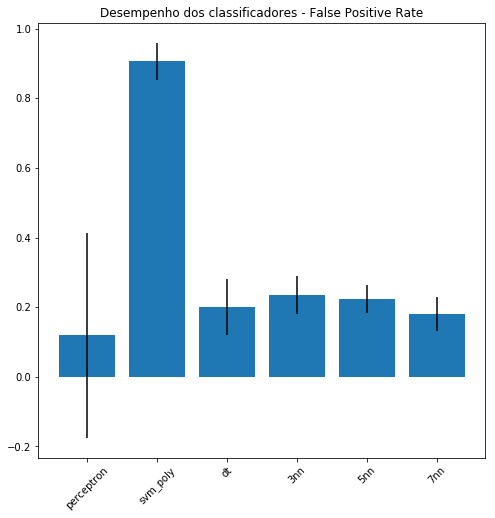

In [22]:
res['kfold'] = run_split(lambda data: kfold_split(data, 10), '10-fold cross validation')

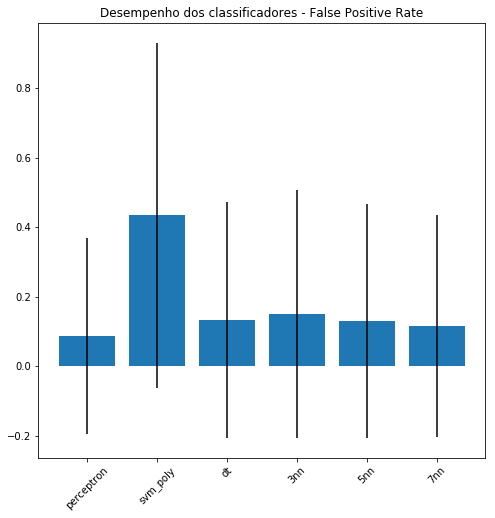

In [17]:
res['leave-one-out'] = run_split(leave_one_out_split, 'Leave-one-out')

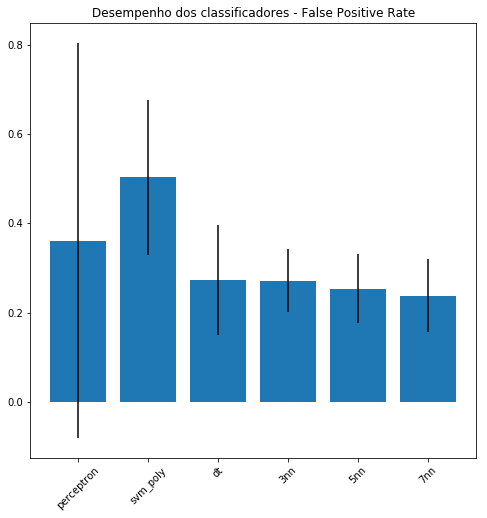

In [20]:
res['bootstrap'] = run_split(lambda data: bootstrap_split(data, 1000, total_frac=1.0), 'Bootstrap (100% of dataset)')

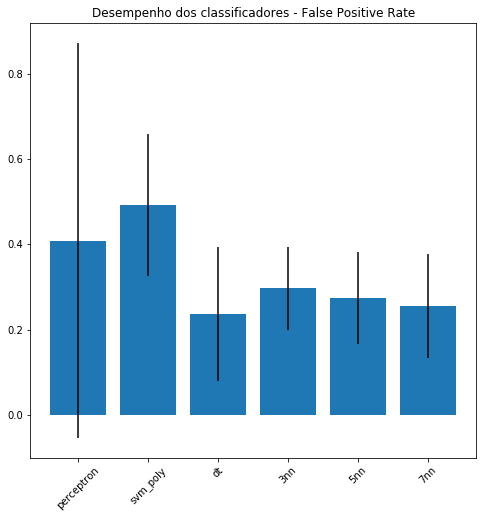

In [21]:
res['bootstrap'] = run_split(lambda data: bootstrap_split(data, 1000, total_frac=0.5), 'Bootstrap (50% of dataset)')

### 4.
Método escolhido: 10-fold cross-validation.

Apresenta variância menor entre todos os classificadores, exceto perceptron, além de exigir tempo de processamento muito menor que os outros dois.
Acreditamos que a maior variância seja resultado da simplicidade do perceptron, não do método de avaliação.

In [30]:
kfold_res = run_split(lambda data: kfold_split(data, 10), '10-fold cross-validation', score_function=confusion_matrix, plot=False)

In [51]:
print('Classifier:\ntnr\tfpr\nfnr\ttpr\n')
for classifier in kfold_res['results']:
    c_score = kfold_res['results'][classifier]
    avg_conf = sum(c_score)/len(c_score)
    fpr = avg_conf[0, 1] / (avg_conf[0, 1] + avg_conf[0, 0])
    tpr = 1 - fpr
    fnr = avg_conf[0, 1] / (avg_conf[0, 1] + avg_conf[1, 1])
    tnr = 1 - fnr
    print(f'{classifier}:\n{tnr:.2f}\t{fpr:.2f}\n{fnr:.2f}\t{tpr:.2f}\n')

Classifier:
tnr	fpr
fnr	tpr

perceptron:
0.41	0.63
0.59	0.37

svm_poly:
0.40	0.69
0.60	0.31

dt:
0.63	0.23
0.37	0.77

3nn:
0.61	0.24
0.39	0.76

5nn:
0.60	0.23
0.40	0.77

7nn:
0.66	0.18
0.34	0.82



Uma opção para escolher o "melhor" classificador é avaliar as medidas acima, tentando maximizar a diagonal principal (de classificações corretas) e minimizando as demais entradas (classificações incorretas). Uma medida que captura bem essa métrica para casos onde o tipo de erro é irrelevante é a acurácia. Para o nosso caso, como queremos minimizar a taxa de falsos positivos, basta encontrar um dos classificadores com valor baixo suficiente dessa estatística que não sacrifique as demais.

O 7nn não apenas é o algoritmo com menor falor de FPR, mas também tem bons valores para as demais métricas. Para este problema específico, o 7nn é o melhor algoritmo para classificação.